# Accor Data

In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
accre = pd.read_csv('./data/july-2017-thru-june-2018.txt', sep="|", chunksize=5000).get_chunk() 
accre.head(10)

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:00,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21
5,15811618,15811618,accre,production,cms_stage2,cms_stage1,59298,autocms,9209.0,2017-07-01T05:00:01,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1063,skim_test
6,15811619,15811619,accre,production,cms_stage2,cms,31000,tuos,126986.0,2017-07-01T05:00:02,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1062,skim_test
7,15811621,15811621,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:22,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_33ee450ebdc4
8,15811624,15811624,accre,production,cms_stage2,cms_stage1,59298,autocms,9209.0,2017-07-01T05:01:01,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp670,skim_test
9,15811625,15811625,accre,production,cms_stage2,cms,31000,tuos,126986.0,2017-07-01T05:01:02,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1078,skim_test


In [14]:
accre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
JobID        5000 non-null object
JobIDRaw     5000 non-null int64
Cluster      5000 non-null object
Partition    5000 non-null object
Account      5000 non-null object
Group        5000 non-null object
GID          5000 non-null int64
User         5000 non-null object
UID          3821 non-null float64
Submit       5000 non-null object
Eligible     5000 non-null object
Start        5000 non-null object
End          5000 non-null object
Elapsed      5000 non-null object
ExitCode     5000 non-null object
State        5000 non-null object
NNodes       5000 non-null int64
NCPUS        5000 non-null int64
ReqCPUS      5000 non-null int64
ReqMem       5000 non-null object
ReqGRES      13 non-null object
ReqTRES      5000 non-null object
Timelimit    5000 non-null object
NodeList     5000 non-null object
JobName      5000 non-null object
dtypes: float64(1), int64(5), object(19)
memory u

In [15]:
accre.shape

(5000, 25)

In [16]:
accre.columns

Index(['JobID', 'JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'NodeList', 'JobName'],
      dtype='object')

In [17]:
# convert Submit and Start to datetime
accre['Submit'] = pd.to_datetime(accre['Submit'], format='%Y/%m/%d')
accre['Start'] = pd.to_datetime(accre['Start'], format='%Y/%m/%d')

In [18]:
# check head of Submit
accre.Submit.head()

0   2017-07-02 00:40:58
1   2017-07-02 00:40:58
2   2017-07-02 00:40:58
3   2017-07-02 00:40:58
4   2017-07-01 05:00:00
Name: Submit, dtype: datetime64[ns]

In [19]:
# check head of Start
accre.Start.head()

0   2017-07-03 02:13:59
1   2017-07-03 02:20:08
2   2017-07-03 02:41:13
3   2017-07-03 02:51:53
4   2017-07-01 05:00:01
Name: Start, dtype: datetime64[ns]

In [20]:
# create Queue_Time column = Start - Submit
accre['Queue_Time'] = accre['Start'] - accre['Submit']
accre.Queue_Time.head()

0   1 days 01:33:01
1   1 days 01:39:10
2   1 days 02:00:15
3   1 days 02:10:55
4   0 days 00:00:01
Name: Queue_Time, dtype: timedelta64[ns]

In [21]:
#remove unnecessary columns
cols = ['Partition', 'JobIDRaw', 'Cluster', 'UID', 'JobName']
accre_reduced = accre.drop(columns=cols)
accre_reduced.head()

,JobID,Account,Group,GID,User,Submit,Eligible,Start,End,Elapsed,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time
0,15806649,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:13:59,2017-07-04T03:19:20,1-01:05:21,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,1 days 01:33:01
1,15806664,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:20:08,2017-07-04T02:11:55,23:51:47,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,1 days 01:39:10
2,15806670,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:41:13,2017-07-04T04:41:04,1-01:59:51,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,1 days 02:00:15
3,15806671,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:51:53,2017-07-04T10:54:13,1-08:02:20,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,1 days 02:10:55
4,15811617,cms_samtest,cms_samtest,59297,uscms010,2017-07-01 05:00:00,2017-07-01T05:00:00,2017-07-01 05:00:01,2017-07-01T05:00:11,00:00:10,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,0 days 00:00:01


In [23]:
# pick columns: 'Elapsed', 'User', 'Group', 'Account'
accre_user_elapsed = accre.sort_values(by='Elapsed', ascending=False)[['JobID', 'Account', 'Group', 'GID', 'User', 'Elapsed']]
accre_user_elapsed.head()

,JobID,Account,Group,GID,User,Elapsed
16,15811634,h_vuiis,h_vuiis,36052,vuiiscci,5-08:00:25
26,15811644,h_vuiis,h_vuiis,36052,vuiiscci,5-08:00:21
18,15811636,h_vuiis,h_vuiis,36052,vuiiscci,5-03:31:54
22,15811640,h_vuiis,h_vuiis,36052,vuiiscci,4-23:00:02
24,15811642,h_vuiis,h_vuiis,36052,vuiiscci,4-22:03:59


In [30]:
#randomization of dataset with reduced amount of data
indices = np.random.randint(0, len(accre_user_elapsed), 500)
random_elapsed = accre_user_elapsed.iloc[indices,:]
random_elapsed.head(10)

,JobID,Account,Group,GID,User,Elapsed
3202,15815816,h_biostat_student,h_biostat_student,59331,mercalnd,02:44:23
828,15812706,cms_stage2,cms,31000,tuos,00:02:55
20,15811638,h_vuiis,h_vuiis,36052,vuiiscci,4-08:30:10
3610,15816274,cms_stage2,cms_stage1,59298,autocms,00:03:22
784,15812643,cms_stage2,cms,31000,tuos,00:04:00
198,15811657_161,p_iglab_csb,p_iglab,20440,nagarr1,00:00:27
786,15812648,cms_stage2,cms,31000,tuos,00:02:20
1869,15814035,cms_stage2,cms,31000,tuos,00:02:31
2439,15814851,cms_stage2,cms_stage1,59298,autocms,00:02:56
4509,15817386_127,p_iglab,p_iglab,20440,nagarr1,00:00:12


In [31]:
#Checking stats of Elapsed
accre_user_elapsed.Elapsed.describe()

count         5000
unique        1829
top       00:00:10
freq            89
Name: Elapsed, dtype: object

In [46]:
# convert Elapsed to datetime
accre_user_elapsed['Elapsed'] = accre_user_elapsed['Elapsed'].str.split('-', expand=True)
accre_user_elapsed.head()
#accre_user_elapsed['Elapsed'] = pd.to_datetime(accre_user_elapsed['Elapsed'], format='%Y/%m/%d')

,JobID,Account,Group,GID,User,Elapsed
16,15811634,h_vuiis,h_vuiis,36052,vuiiscci,NaN
26,15811644,h_vuiis,h_vuiis,36052,vuiiscci,NaN
18,15811636,h_vuiis,h_vuiis,36052,vuiiscci,NaN
22,15811640,h_vuiis,h_vuiis,36052,vuiiscci,NaN
24,15811642,h_vuiis,h_vuiis,36052,vuiiscci,NaN


TypeError: unsupported operand type(s) for /: 'str' and 'int'

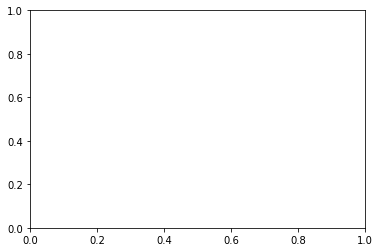

In [43]:
boxplot = accre_user_elapsed.boxplot(column='Elapsed',by='User')